In [1]:
#import packages
import numpy as np
import copy
import pandas
import os
import imp
import pickle
from scipy.interpolate import interp1d
import warnings
import time
import matplotlib.pyplot as plt
import inspect
import types
import math as mat
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
import datetime
from matplotlib import animation
from IPython.display import HTML
from tempfile import NamedTemporaryFile
import matplotlib.backends.backend_pdf
from scipy import interpolate
from itertools import groupby
import re
import csv
import copy
from fnmatch import fnmatch
import json
import h5py 
import copy
import math
import sys
import itertools
from matplotlib import gridspec
pi = math.pi

sys.path.append("/Users/fponce/Documents/vdesert/vdesert_funcs/") 
import plot_funcs.mpl_functions as mpl
from scipy.signal import butter,filtfilt

sns.set()
sns.set_style()
%matplotlib inline

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#done in first notebook
#unwrap before dejitter
#first dejitter 
#then resample

#done here
#then filter
#saccade find it

# #unwrap
# dejitter
# resample
# filter 
# saccade
# re-wrap

In [3]:
import analysis_funcs.saccade_ider as fs
import analysis_funcs.saccade_ider_n_plot as fs_pt

In [4]:
#import data from pickles

pickle_path = "/Users/fponce/Documents/vdesert/VD_030620/saccade_ider_042320/VD_030620_sf.p"

all_exp_data = pickle.load(open( pickle_path, "rb" ) )

datapaths = all_exp_data[0]
allangles_vf_uw = all_exp_data[1]
all_start_frames_m = all_exp_data[2]
all_end_frames_m = all_exp_data[3]

print(len(allangles_vf_uw))
print(len(datapaths))

15
15


In [5]:
# #plotting
# sns.set_style("ticks")
# tp = [5,6,7]
# bckclr_labels = ['darkseagreen', 'lavender','lightyellow']
# myc = ["red", "medium green", "denim blue"]
# for j in range(len(tp)):
#     fig, ax1 = plt.subplots(1,1,figsize=(15, 5))
#     for i in range(len(allangles_vf)): 
#         p = allangles_vf[i][all_start_frames_m[i][tp[j]]:all_end_frames_m[i][tp[j]]]

#         ax1.plot((0,21600), (0,0), 'r', linewidth= 2)

#         mycolor = list(np.random.choice(range(256), size=3))
#         plt.scatter(np.arange(len(p)), p, c=sns.xkcd_rgb['black'], alpha=0.1, s=10)#,'k',alpha= 0.5)
#         ax1.set_title(j)
#         ax1.set_ylim([-200, 200])
#         ax1.set_xlim([0, (len(p))])
        
# #         ax1.set_xticks(np.arange(0, 5401, 1800))
#         ax1.set_yticks(np.arange(-180, 225,45))
#         ax1.yaxis.set_tick_params(labelsize=20)
#         ax1.xaxis.set_tick_params(labelsize=20)
#         sns.despine()
#         ax1.tick_params(direction='in', length=8, width=2)
#         sns.despine(offset=10, trim=False);
#         ax1.spines['left'].set_linewidth(2)
#         ax1.spines['bottom'].set_linewidth(2)
#         ax1.grid(True,linewidth=2)  

In [6]:
# #plotting easier to see single traces
# sns.set_style("ticks")
# tp = [5,6,7]
# bckclr_labels = ['darkseagreen', 'lavender','lightyellow']
# myc = ["red", "medium green", "denim blue"]
# for j in range(len(tp)):
#     fig, ax1 = plt.subplots(1,1,figsize=(15, 5))
#     for i in [5]:#range(len(allangles_vf)): 
#         p = allangles_vf_filt[i][all_start_frames_m[i][tp[j]]:all_end_frames_m[i][tp[j]]]

#         ax1.plot((0,21600), (0,0), 'r', linewidth= 2)

#         mycolor = list(np.random.choice(range(256), size=3))
#         #plt.scatter(np.arange(len(p)), p, c=sns.xkcd_rgb['black'], alpha=0.1, s=10)#,'k',alpha= 0.5)
#         plt.plot(p)
        
#         ax1.set_title(j)
#         ax1.set_ylim([-200, 200])
#         ax1.set_xlim([0, (len(p))])
#         ax1.set_xlim([3800, 4100])
        
# #         ax1.set_xticks(np.arange(0, 5401, 1800))
#         ax1.set_yticks(np.arange(-180, 225,45))
#         ax1.yaxis.set_tick_params(labelsize=20)
#         ax1.xaxis.set_tick_params(labelsize=20)
#         sns.despine()
#         ax1.tick_params(direction='in', length=8, width=2)
#         sns.despine(offset=10, trim=False);
#         ax1.spines['left'].set_linewidth(2)
#         ax1.spines['bottom'].set_linewidth(2)
#         ax1.grid(True,linewidth=2)

In [7]:
# #plotting dot plots
# sns.set_style("ticks")
# tp = [5,6,7]
# bckclr_labels = ['darkseagreen', 'lavender','lightyellow']
# myc = ["red", "medium green", "denim blue"]
# for j in range(len(tp)):
#     fig, ax1 = plt.subplots(1,1,figsize=(15, 5))
#     for i in range(len(allangles_vf_uw)): 
#         p = allangles_vf_uw[i][all_start_frames_m[i][tp[j]]:all_end_frames_m[i][tp[j]]]

#         ax1.plot((0,21600), (0,0), 'r', linewidth= 2)

#         #ax1.plot((0,5400), (b, b), 'gold', linewidth= 4)
# #         if j in [1,4]:
# #             ax1.plot((0,5400), (0, 0), 'yellow', linewidth= 4)
# #         else:
# #             pass
#         mycolor = list(np.random.choice(range(256), size=3))
#         plt.scatter(np.arange(len(p)), p, c=sns.xkcd_rgb['black'], alpha=0.1, s=10)#,'k',alpha= 0.5)
#         ax1.set_title(j)
#         ax1.set_ylim([-200, 200])
#         ax1.set_xlim([0, (len(p))])
        
# #         ax1.set_xticks(np.arange(0, 5401, 1800))
#         ax1.set_yticks(np.arange(-180, 225,45))
#         ax1.yaxis.set_tick_params(labelsize=20)
#         ax1.xaxis.set_tick_params(labelsize=20)
#             #ax1.set_xticklabels((round(all_start_frames[j]/30),round(all_end_frames[j+1]/30)))
#             #box, ticks format
#         sns.despine()
#         ax1.tick_params(direction='in', length=8, width=2)
#         sns.despine(offset=10, trim=False);
#         ax1.spines['left'].set_linewidth(2)
#         ax1.spines['bottom'].set_linewidth(2)
#         ax1.grid(True,linewidth=2)
        
# #         if j in [0,3]:
# #             ax1.patch.set_facecolor(bckclr_labels[0])
# #         elif j in [1,4]:
# #             ax1.patch.set_facecolor(bckclr_labels[1])
# #         elif j in [2,5]:
# #             ax1.patch.set_facecolor(bckclr_labels[2])            
#         ax1.patch.set_alpha(0.7)

In [8]:
# #all_start_frames_m, all_end_frames_m
# for i in range(len(allangles_vf_filt)):
#     print('--------------------------')
#     print(i)
#     for j in range(len(all_start_frames_m[0])):
#         print('-----------')
#         print(j)
#         print([all_start_frames_m[i][j],all_end_frames_m[i][j]])

In [9]:
#run saccade identifier for all exp

#path to save figs if True
sFigPath = '/Users/fponce/Documents/vdesert/VD_030620/saccade_ider_042420/'

all_SMagMx = []
all_SMagMn = []
all_SAmx = []
all_SAmn = []
all_SVmx = []
all_SVmn = []
all_headingVelo = []

for i in range(len(allangles_vf_uw)):
    flyAngle_uw = np.deg2rad(allangles_vf_uw[i])
    #flyAngle_s = np.rad2deg(np.unwrap(np.deg2rad(flyAngle_wr), discont = np.pi))
    SMagMx, SMagMn, SAmx, SAmn, SVmx, SVmn, headingVelo = fs.findSacs(flyAngle_uw, i, sFigPath, False)
    all_SMagMx.append(SMagMx)
    all_SMagMn.append(SMagMn)
    all_SAmx.append(SAmx)
    all_SAmn.append(SAmn)
    all_SVmx.append(SVmx)
    all_SVmn.append(SVmn)
    all_headingVelo.append(headingVelo)

In [10]:
#plotting identified saccades, angular vel, angle, func

def pltSacs_1(flyAngle, fly_n, trial_name, sFigPath, headingVelo, SVMxThr, SVMnThr, flyAngleFilt, SSctnMx,  \
              SSctnMn, SAmx, SAmn,):

    a = (flyAngleFilt)
    a_wr1 = np.arctan2(np.sin(np.deg2rad(a)), np.cos(np.deg2rad(a)))
    a_wr = np.rad2deg(a_wr1)
    
    SSctnMx_wr1 = np.arctan2(np.sin(np.deg2rad(SSctnMx)), np.cos(np.deg2rad(SSctnMx)))
    SSctnMx_wr = (np.rad2deg(SSctnMx_wr1))
    SSctnMn_wr1 = np.arctan2(np.sin(np.deg2rad(SSctnMn)), np.cos(np.deg2rad(SSctnMn)))
    SSctnMn_wr = (np.rad2deg(SSctnMn_wr1))
    
    sns.set_style("ticks")
    

#     # # default values for saccade ider
#     fVec, fs, headingVeloThresh, headingVeloCeil, magThresh, magCeil = \
#     np.zeros_like(flyAngle),30., 60., 2500., 6., 180.
    
    # # default values for saccade ider
    fVec, fs, headingVeloThresh, headingVeloCeil, magThresh, magCeil = \
    np.zeros_like(flyAngle),30., 40., 2500., 6., 180.


    timeCol = np.arange(len(flyAngle))
    sttT, endT = timeCol[0], timeCol[-1] # substitute if desired
    figure_padding = 0.25
    subplot_padding = 0.3
    kleur2 = 'black'
    lijnbreedte = 1#.5
    WoverH = 2. # figure ratio: W/H

    headingVeloRange = 20 * headingVeloThresh

    yLimMin, yLimMax = np.nanmin(flyAngle[10:-10]), np.nanmax(flyAngle[10:-10])

    yLimMinPlt = yLimMin#-yRangeAdd

    figH = 10.
    figW = WoverH * figH
    fig = plt.figure(figsize=(15,15))
    fig.set_facecolor('w')

    aspect_ratio = (4+subplot_padding)/(12.+subplot_padding)
    
    gs0 = gridspec.GridSpec(3, 1, height_ratios=[2,2,2]) #width_ratios=[20,1,1,1],
    
    ax0 = fig.add_subplot(gs0[0, :])# headingVelo
    ax2 = fig.add_subplot(gs0[1, :])# LmR and sacs
    ax3 = fig.add_subplot(gs0[2, :])

    #x= 0 line
    ax0.axhspan(0, 0, alpha=1, color='k', zorder=0, linewidth=.5*lijnbreedte)
    
    #threshhold lines angular velocities
    ax0.axhspan(headingVeloThresh, headingVeloThresh, linestyle='--',
                alpha=1, color='k', zorder=0, linewidth=0.9)
    ax0.axhspan(-headingVeloThresh, -headingVeloThresh, linestyle='--',
                alpha=1, color='k', zorder=0, linewidth=0.9)
    
    #headingVeloCeil might not show up in graph
    ax0.axhspan(headingVeloCeil, headingVeloCeil, linestyle=':',
                alpha=1, color='g', zorder=1, linewidth=1)
    ax0.axhspan(-headingVeloCeil, -headingVeloCeil, linestyle=':',
                alpha=1, color='k', zorder=1, linewidth=1)

    #angular velocity
    ax0.plot(timeCol, headingVelo, color='k', zorder=2, linewidth=lijnbreedte)
    ax0.plot(timeCol, SVMxThr, linestyle='None', marker='.', color='b', markersize=5, zorder=2)
    ax0.plot(timeCol, SVMnThr, linestyle='None', marker='.', color='r', markersize=5, zorder=2)

    #heading plotted in second graph
    ax2.plot(timeCol, flyAngle, color='k', zorder=1, linewidth=1)
    #ax2.plot(timeCol, flyAngleFilt, color='g', zorder=1, linewidth=.5)
    
    #coloring the saccades in the heading in second plot
    ax2.plot(timeCol, SSctnMx, color='b', zorder=2, linewidth=1)
    ax2.plot(timeCol, SSctnMn, color='r', zorder=2, linewidth=1)

    #heading plotted in third graph
    #plt.scatter(np.arange(len(p))
    
    ax3.scatter(timeCol, a_wr, color='k', zorder=2, linewidth=1, s = 1)
    #line indicating sf 
    ax3.axhspan(0, 0, alpha=1, color='gold', zorder=1, linewidth=2)

    ## Saccade ID overlays
    #sIdcs = np.argwhere(np.abs(SAmx[~np.isnan(SAmx)])>0)
    sIdcs = np.argwhere(np.abs(SAmx)>0)
    for sIdx in sIdcs:
        ax3.axvline(x=timeCol[sIdx], color='b', dashes=[1, 1], linewidth=2)
    sIdcs = np.argwhere(np.abs(SAmn)>0)
    for sIdx in sIdcs:
        ax3.axvline(x=timeCol[sIdx], color='r', dashes=[1, 1], linewidth=2)


    #coloring the saccades in the heading in second plot
#     ax3.plot(timeCol, SSctnMx_wr, color='b', zorder=2, linewidth=1)
#     ax3.plot(timeCol, SSctnMn_wr, color='r', zorder=2, linewidth=1)
    ax3.scatter(timeCol, SSctnMx_wr, color='b', zorder=3, s = 1)
    ax3.scatter(timeCol, SSctnMn_wr, color='r', zorder=3, s = 1)
    
    ##formatting##
    ax0.set_ylabel('ang. vel. ($^\circ$/s)', labelpad=0, fontname='Arial', fontsize = 16, fontweight='bold')
    #ax0.yaxis.set_label_position('right')
    ax0.set_xlim((sttT, endT))
    ax0.set_ylim((-headingVeloRange,headingVeloRange)) #data

    ax2.set_ylabel('angle unwr ($^\circ$)', labelpad=1, fontname='Arial', fontsize = 16, fontweight='bold')
    ax2.set_xlim((sttT, endT))
    ax2.set_ylim((yLimMinPlt,yLimMax)) #data
    
    ax3.set_ylabel('angle ($^\circ$)', labelpad=1, fontname='Arial', fontsize = 16, fontweight='bold')
    ax3.set_xlabel('Frames', labelpad=1, fontname='Arial', fontsize = 16, fontweight='bold')
    ax3.set_xlim((sttT, endT)) 
    ax3.set_ylim([-180, 180])
    ax3.set_yticks(np.arange(-180, 225,45))
    
    sns.despine()
    ax0.tick_params(direction='out', length=8, width=2)
    sns.despine(offset=10, trim=False);
    ax0.spines['left'].set_linewidth(2)
    ax0.spines['bottom'].set_linewidth(2)
    #ax0.grid(True,linewidth=1)
    ax0.set_xticklabels([])
    ax0.yaxis.set_tick_params(labelsize=14)
    
    sns.despine()
    ax2.tick_params(direction='out', length=8, width=2)
    sns.despine(offset=10, trim=False);
    ax2.spines['left'].set_linewidth(2)
    ax2.spines['bottom'].set_linewidth(2)
    #ax2.grid(True,linewidth=1)
    ax2.set_xticklabels([])
    ax2.yaxis.set_tick_params(labelsize=14)
    
    sns.despine()
    ax3.tick_params(direction='out', length=8, width=2)
    sns.despine(offset=10, trim=False);
    ax3.spines['left'].set_linewidth(2)
    ax3.spines['bottom'].set_linewidth(2)
    #ax3.grid(True,linewidth=1)
    ax3.xaxis.set_tick_params(labelsize=14)
    ax3.yaxis.set_tick_params(labelsize=14)

    if not os.path.exists(sFigPath):
        #os.makedirs(sFigPath)
        print('fig directory does not exist')
#     print ('figs can be found here: ' + sFigPath)

    #saving fig
    savePlotName = sFigPath + 'fly' + str(fly_n) +'_t_'+str(trial_name)+ '.png'
    fig.savefig(savePlotName , bbox_inches='tight', dpi = 600)#dpi = 1200)
    plt.close

In [11]:
#tp = [5,11,12,14]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in greater


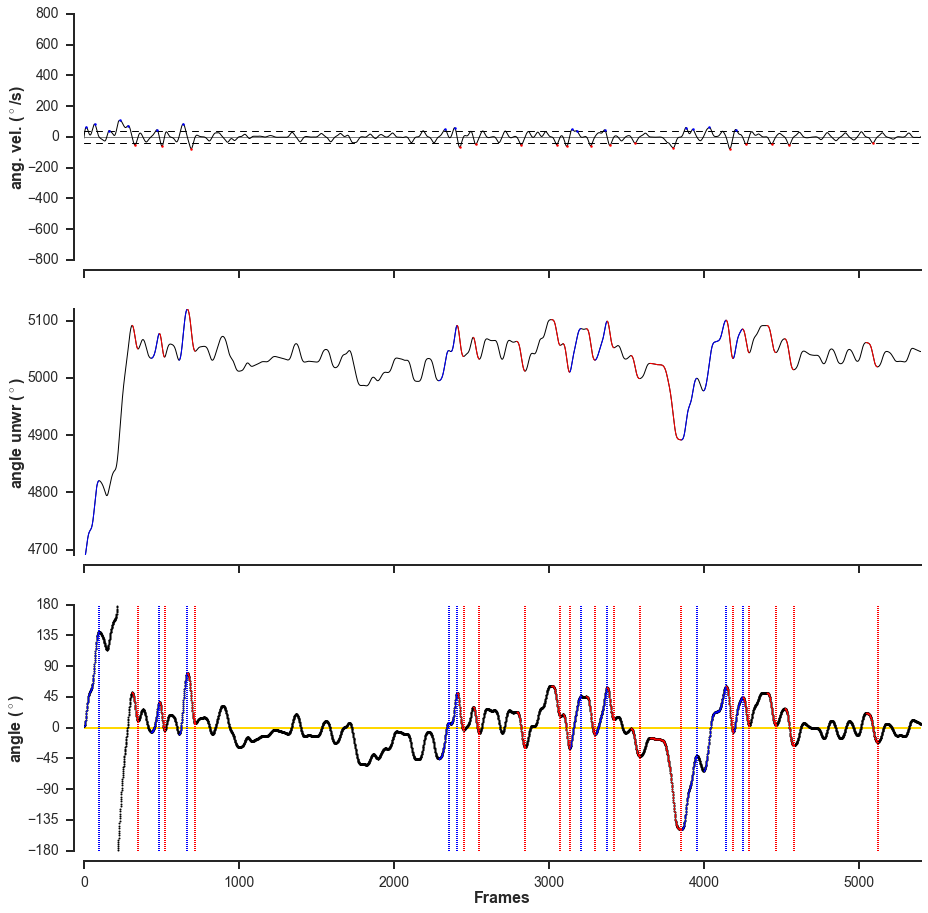

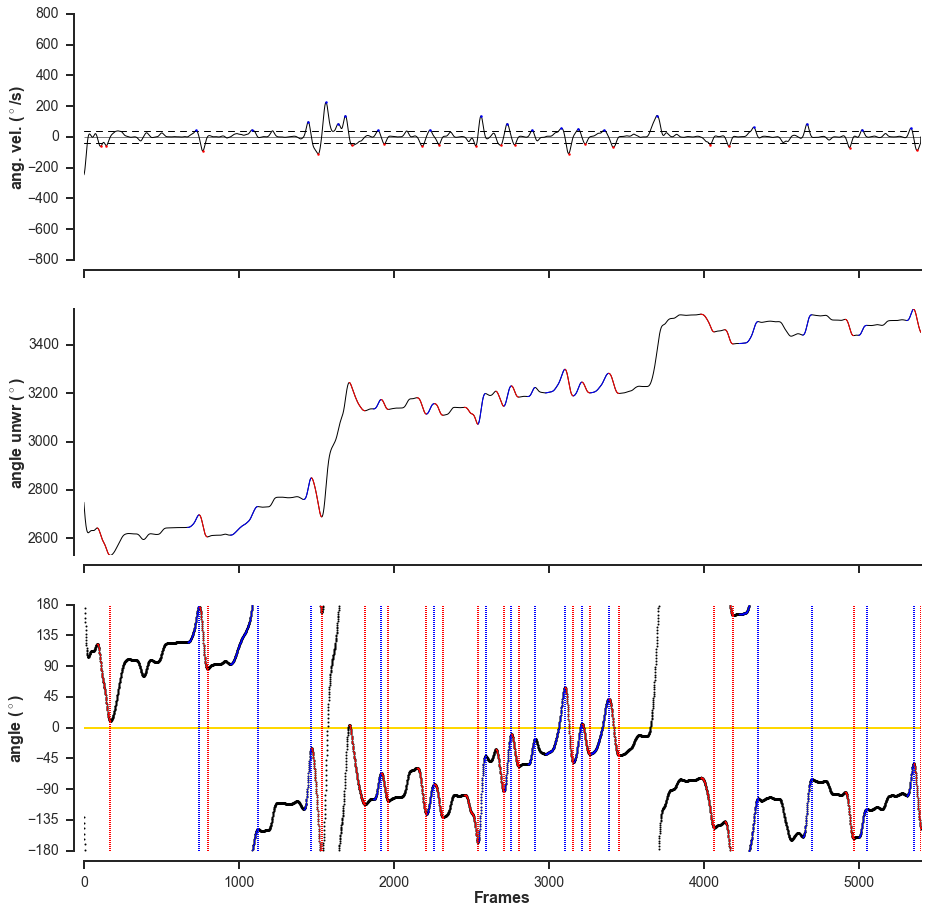

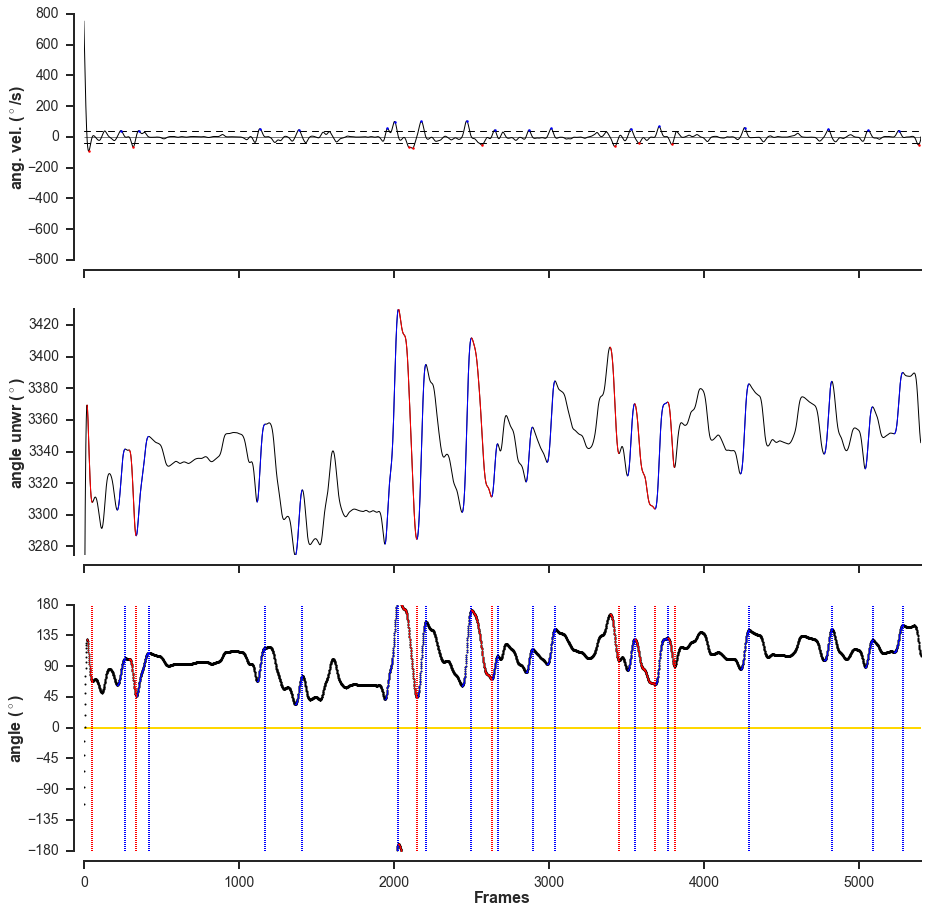

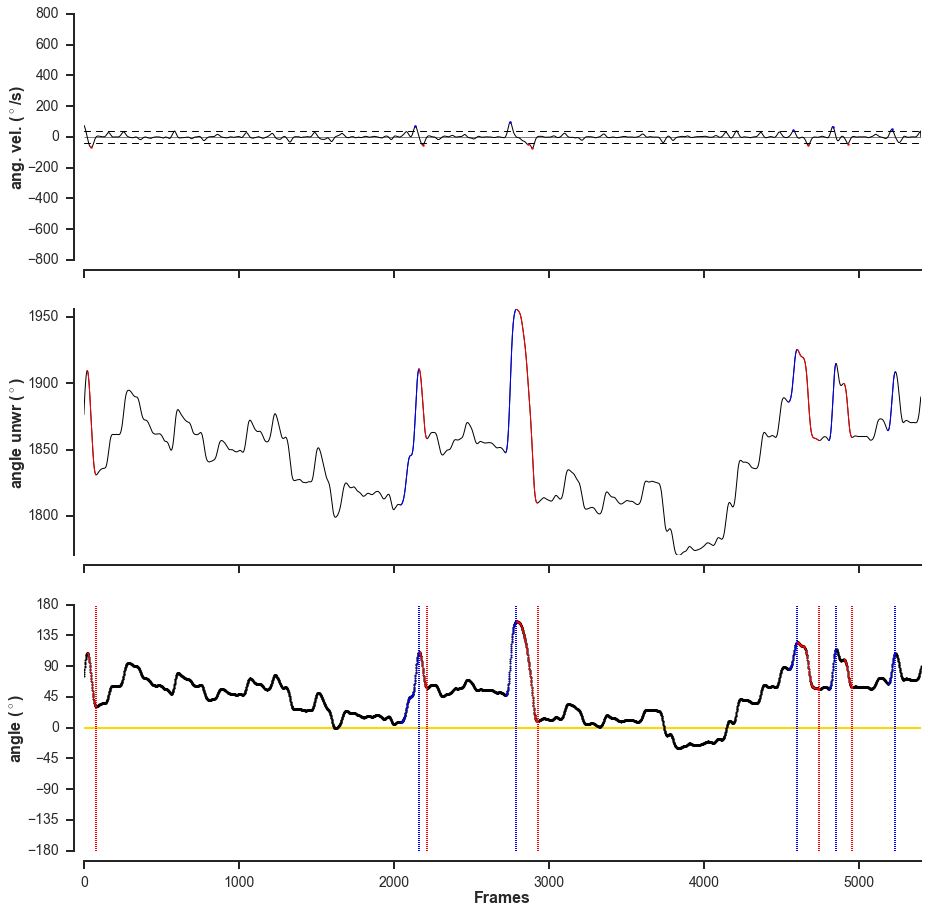

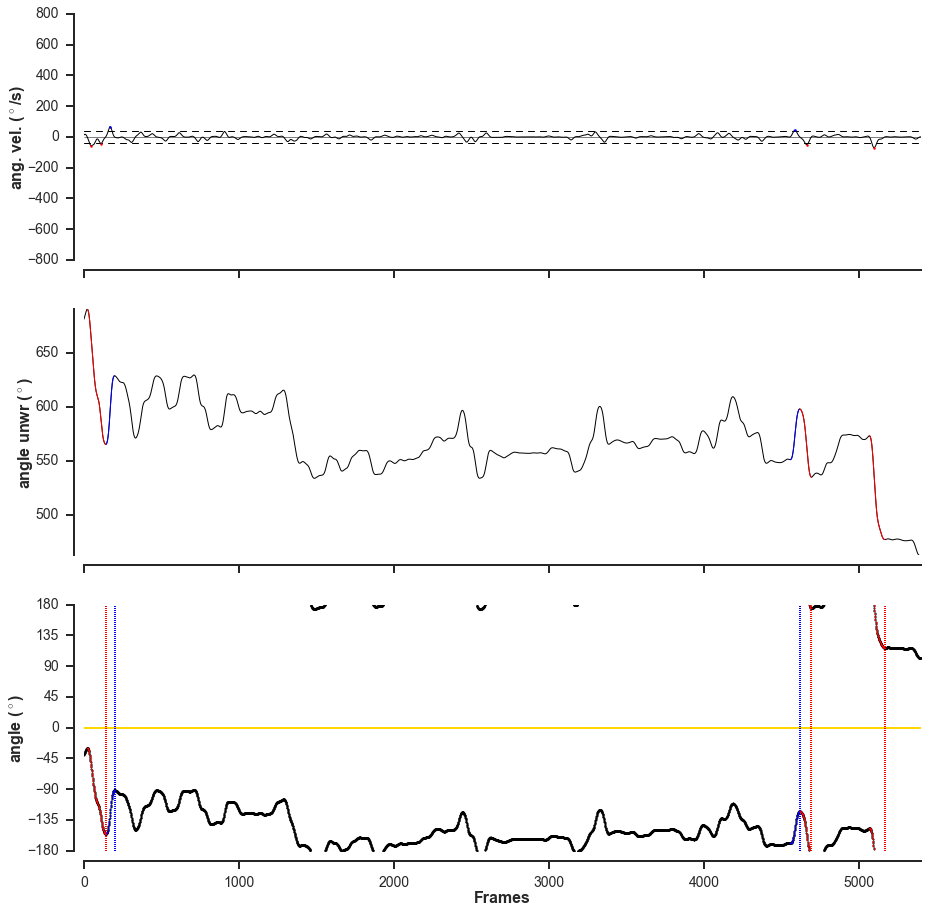

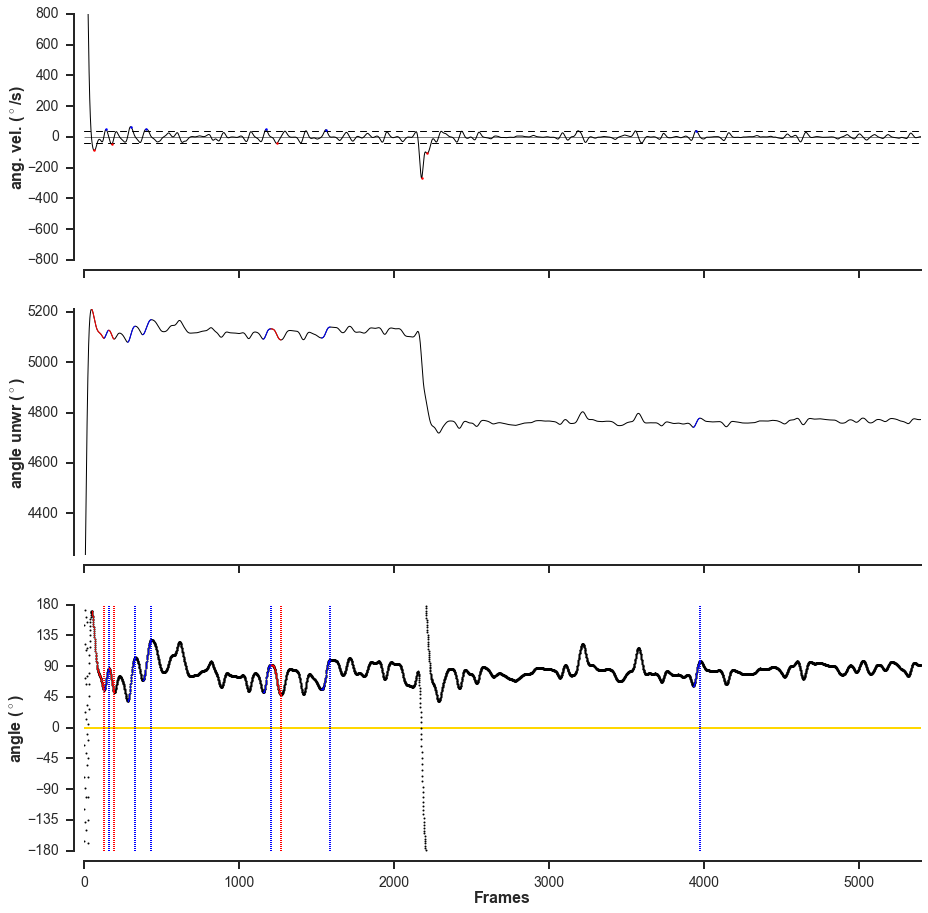

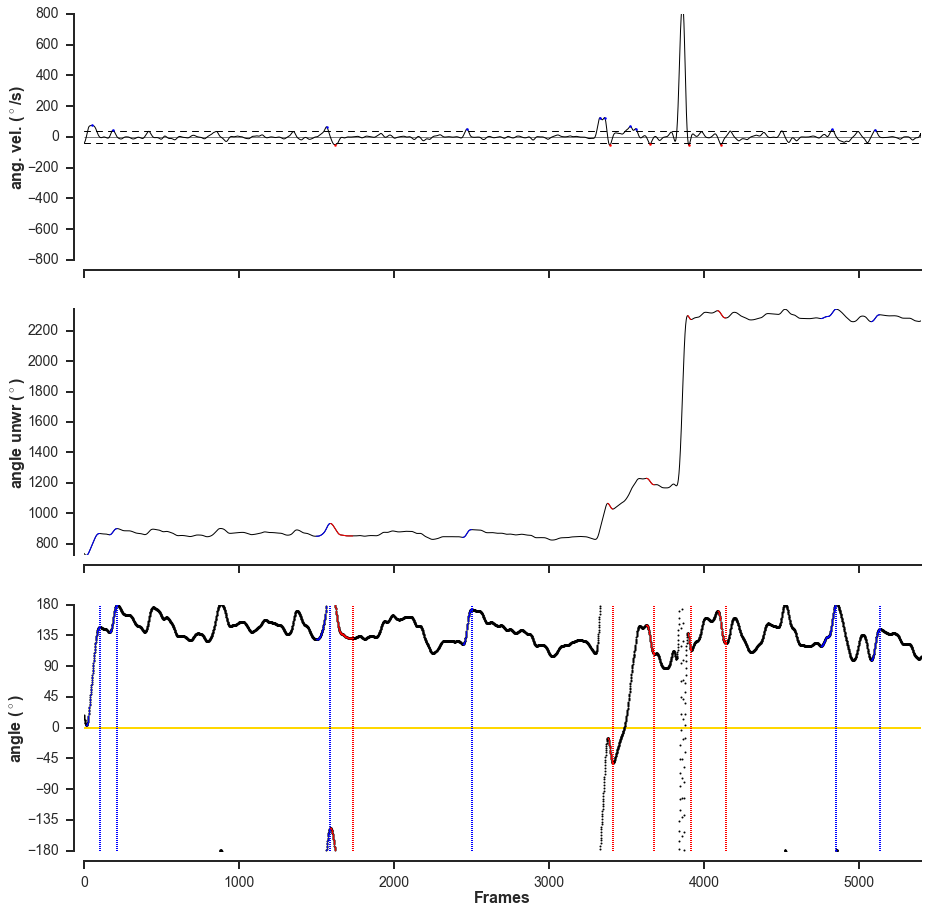

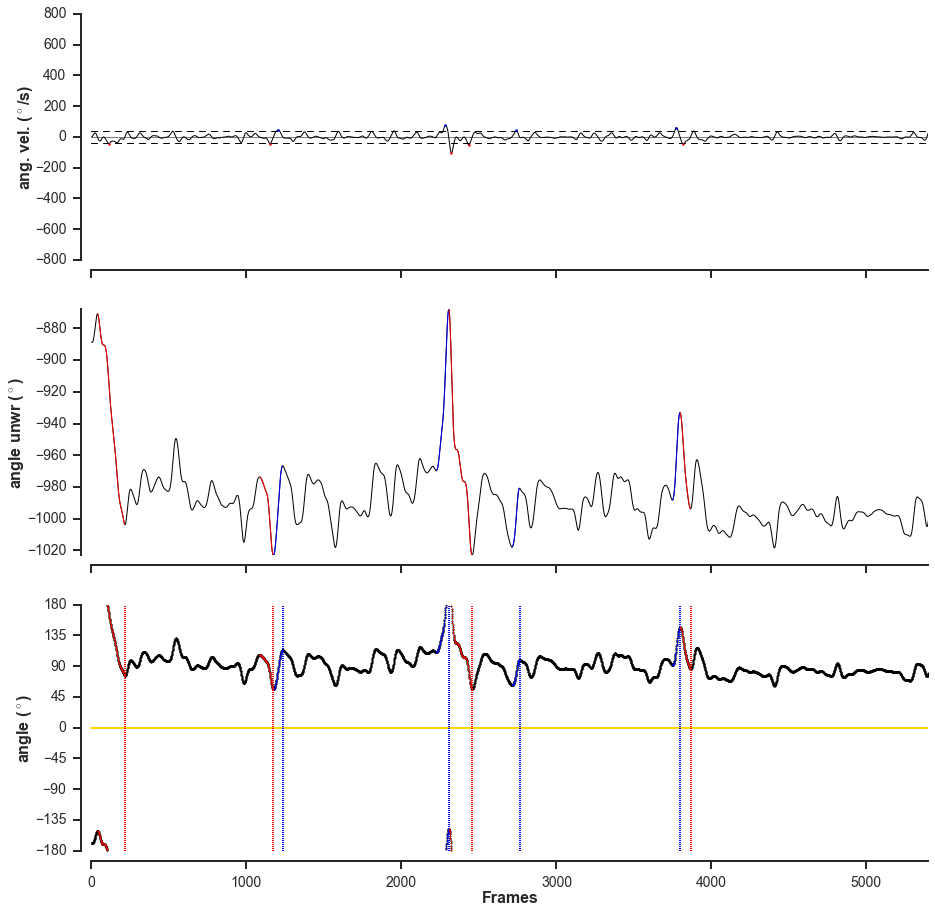

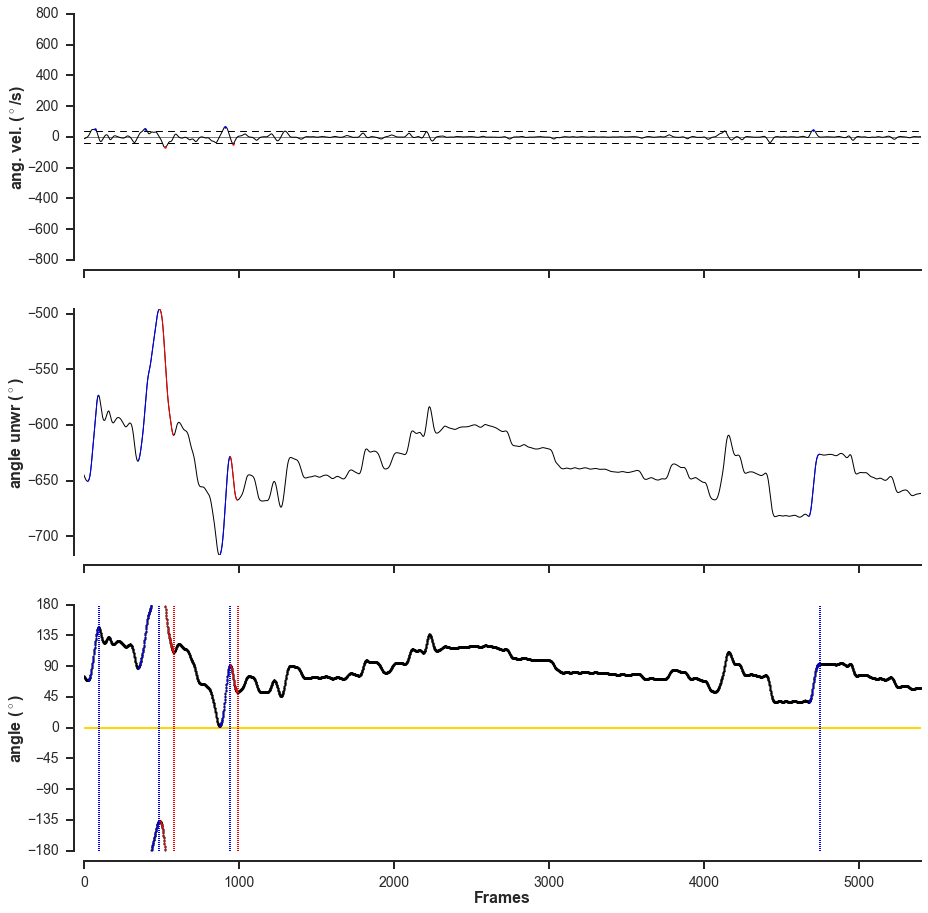

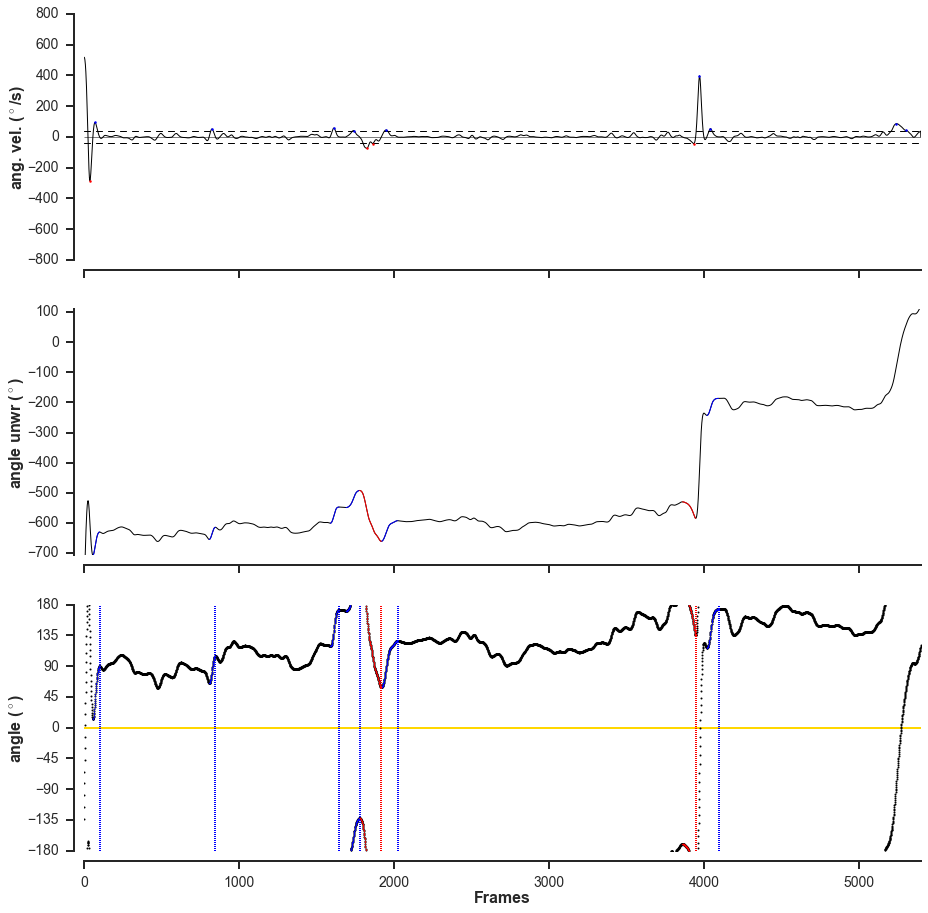

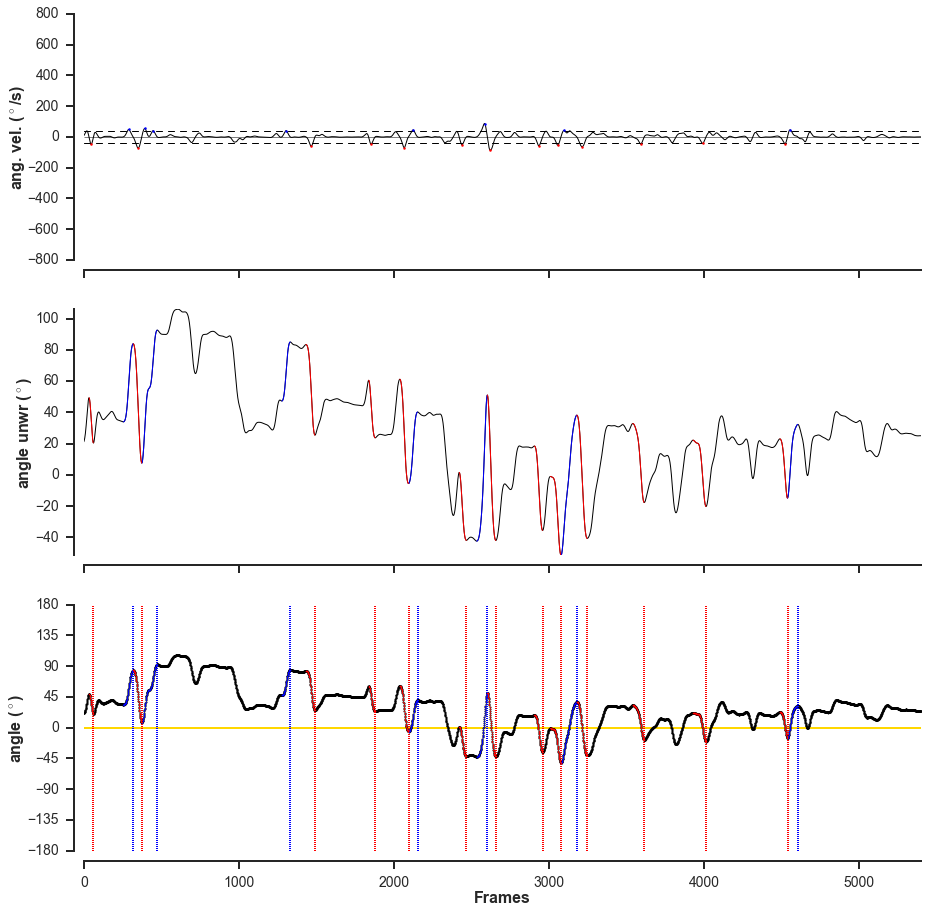

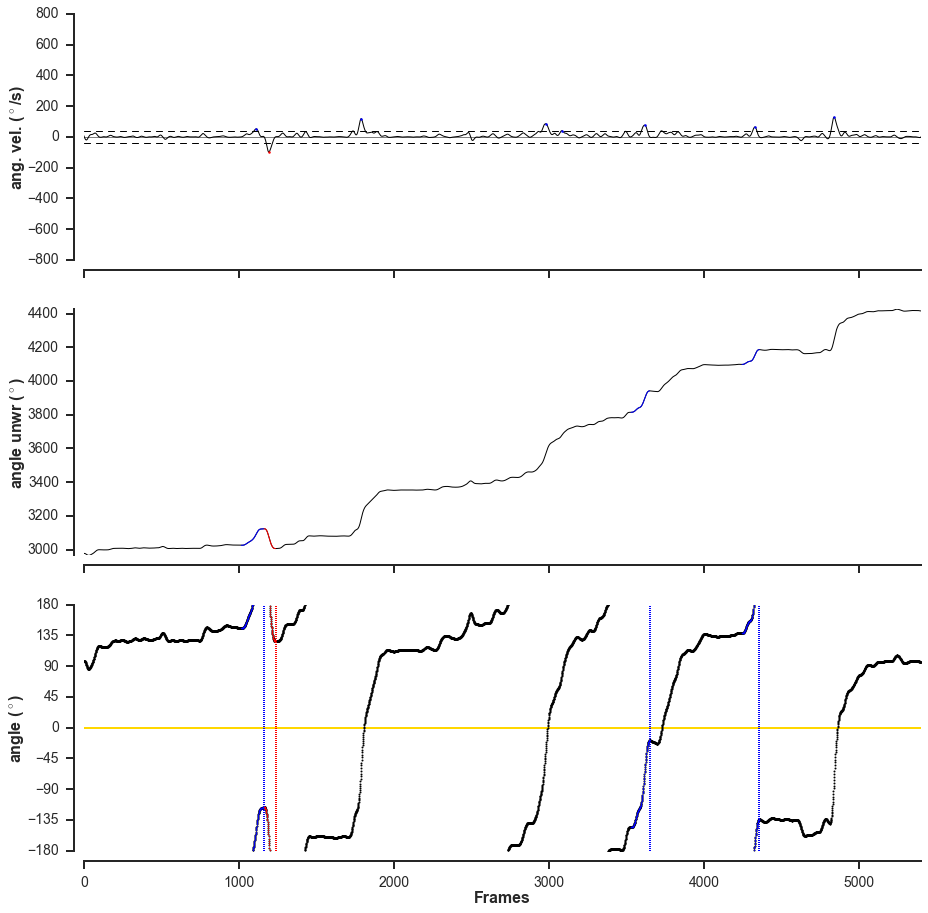

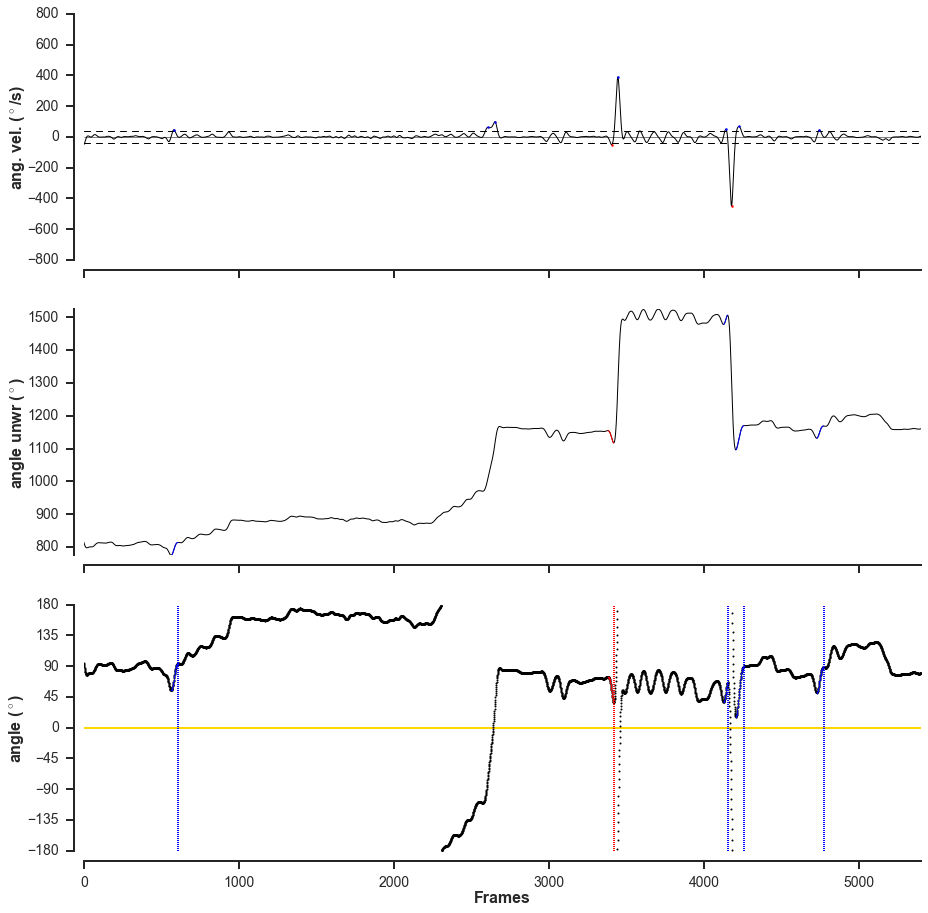

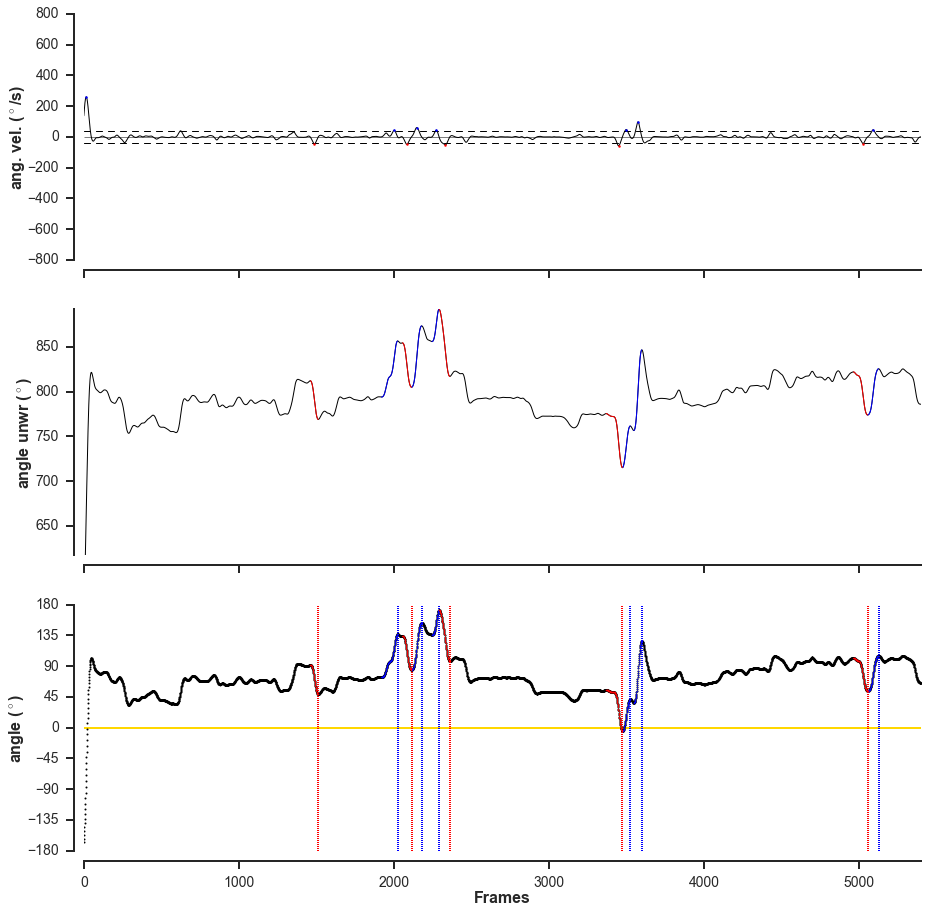

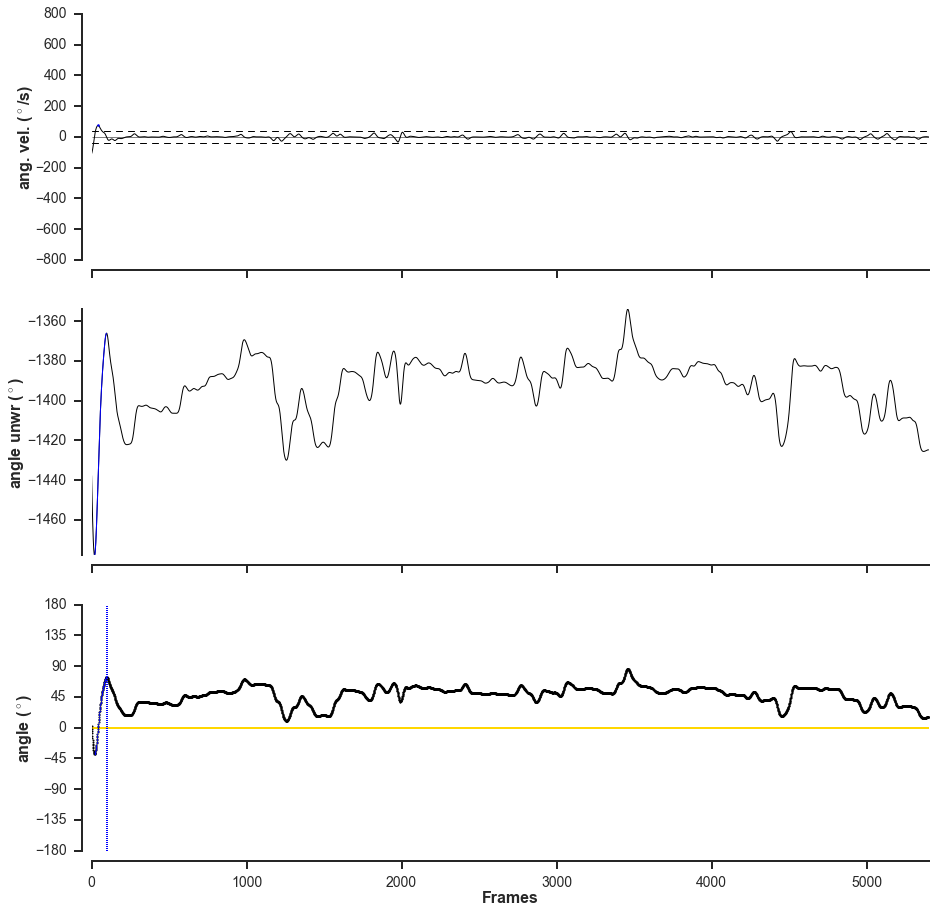

In [12]:
#run saccade identifier for single time bout (t)

#path to save figs if True
sFigPath_t = '/Users/fponce/Documents/vdesert/VD_030620/saccade_ider_042420/sf/'

# all_SMagMx_t = []
# all_SMagMn_t = []
# all_SAmx_t = []
# all_SAmn_t = []
# all_SVmx_t = []
# all_SVmn_t = []
# all_headingVelo_t = []

tpj = 7
for i in range(len(allangles_vf_uw)):

    j1 = all_start_frames_m[i][tpj]
    j2 = all_end_frames_m[i][tpj]
    
#     j1 = 18923
#     j2 = 25523
#     print(j1,j2)

    flyAngle_uw = allangles_vf_uw[i][j1:j2]

    SMagMx_t, SMagMn_t, SAmx_t, SAmn_t, SVmx_t, SVmn_t, headingVelo_t, SVMxThr_t, SVMnThr_t, \
    flyAngleFilt_t, SSctnMx_t, SSctnMn_t = fs_pt.findSacs_n_plot(flyAngle_uw, i, sFigPath_t, False)
    
    xxx = SVMxThr_t[~np.isnan(SVMxThr_t)]
    yyy = SVmx_t[~np.isnan(SVmx_t)]
    
    pltSacs_1(flyAngle_uw, i, tpj, sFigPath_t, headingVelo_t, SVMxThr_t, SVMnThr_t, flyAngleFilt_t,\
              SSctnMx_t, SSctnMn_t, SAmx_t, SAmn_t)
    
    
    
#     all_SMagMx_t.append(SMagMx)
#     all_SMagMn_t.append(SMagMn_t)
#     all_SAmx_t.append(SAmx_t)
#     all_SAmn_t.append(SAmn_t)
#     all_SVmx_t.append(SVmx_t)
#     all_SVmn_t.append(SVmn_t)
#     all_headingVelo_t.append(headingVelo_t)

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ValueError: x must be 1D or 2D

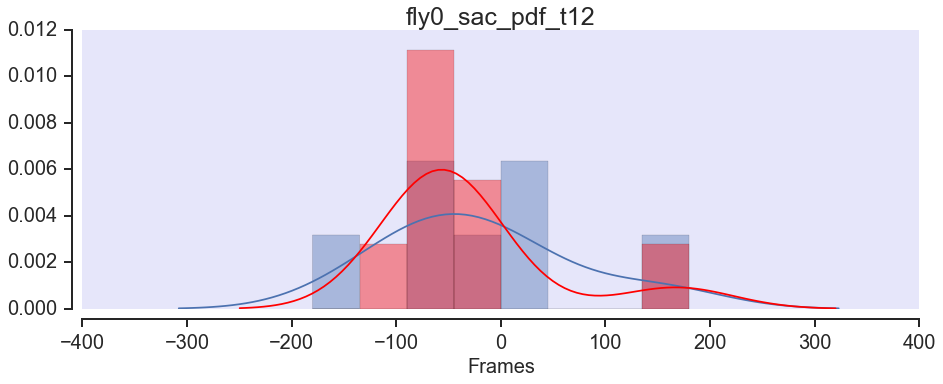

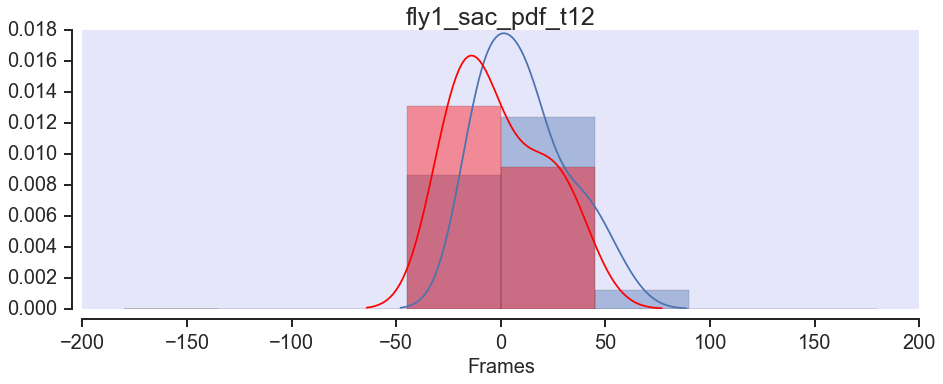

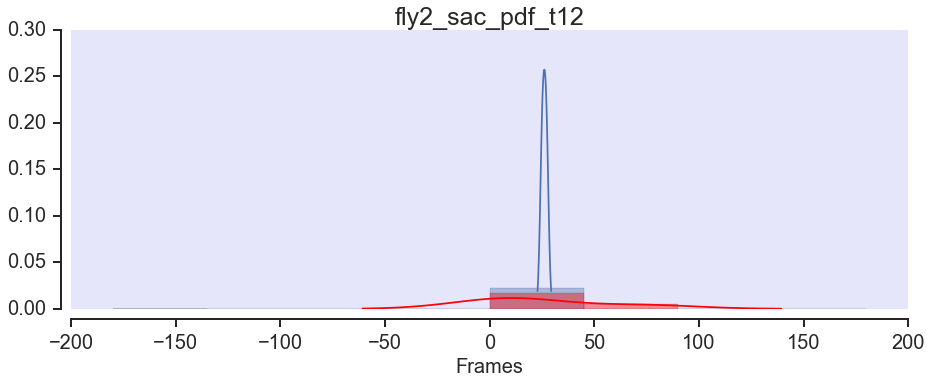

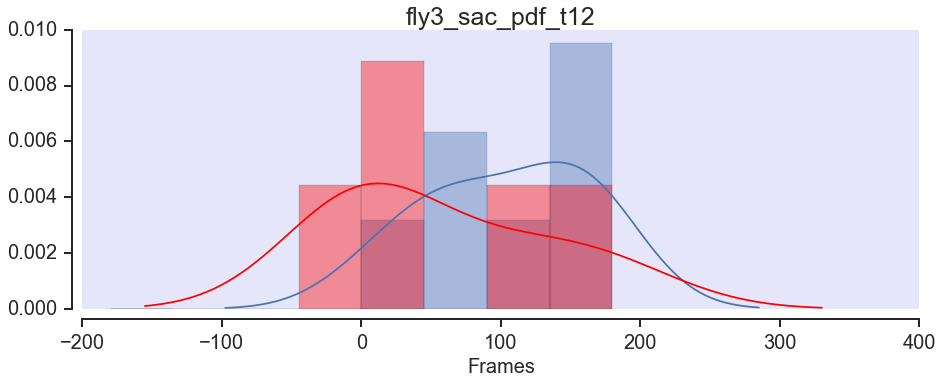

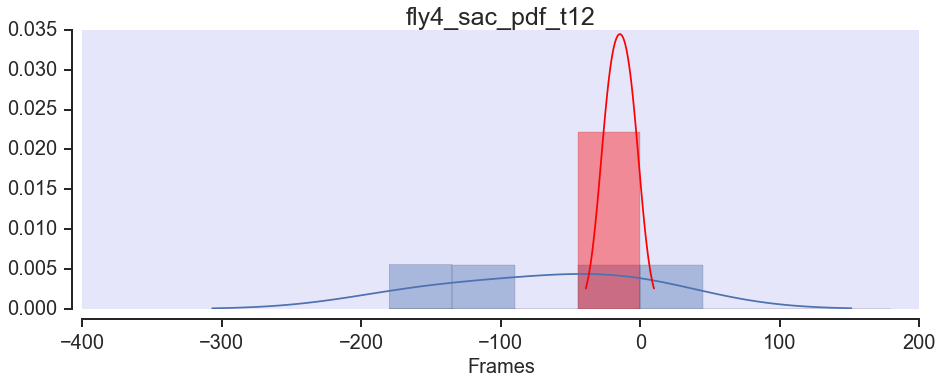

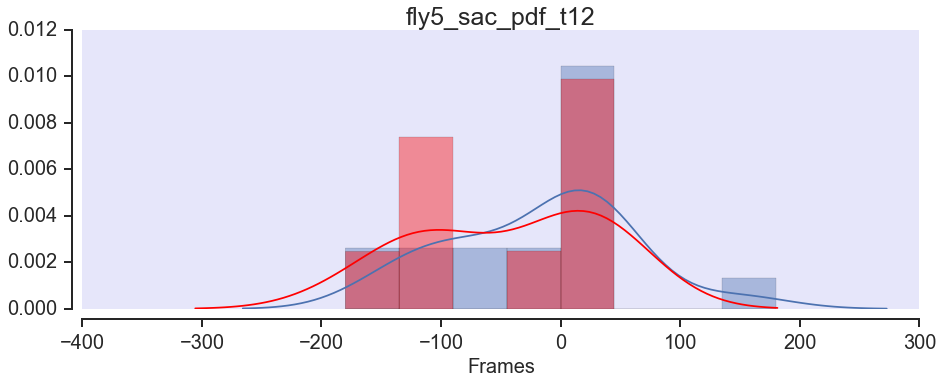

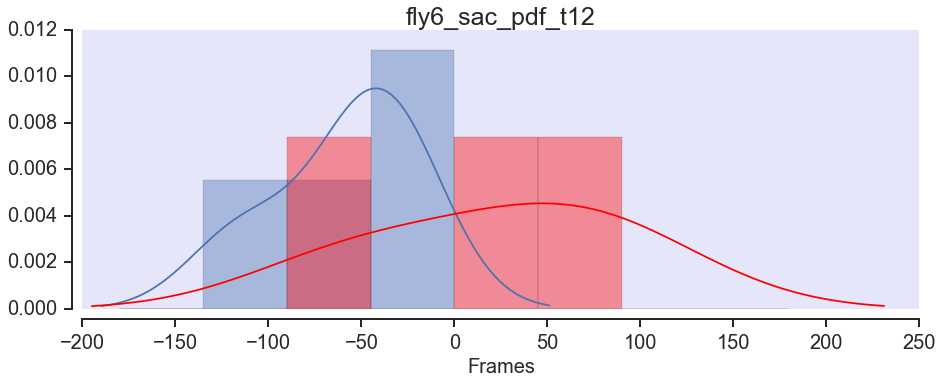

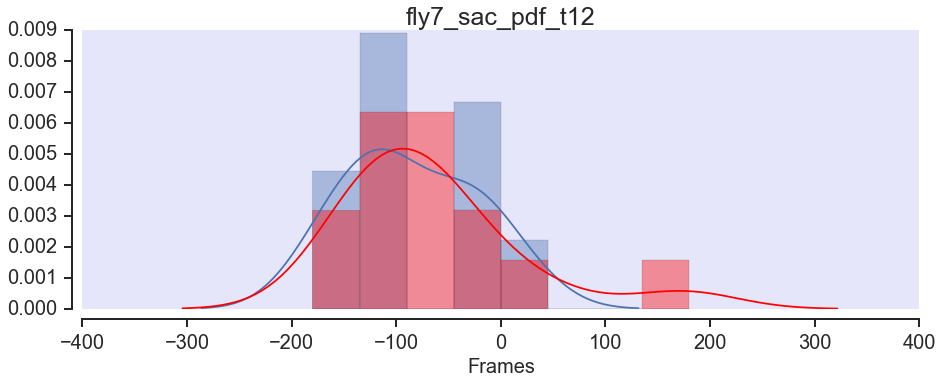

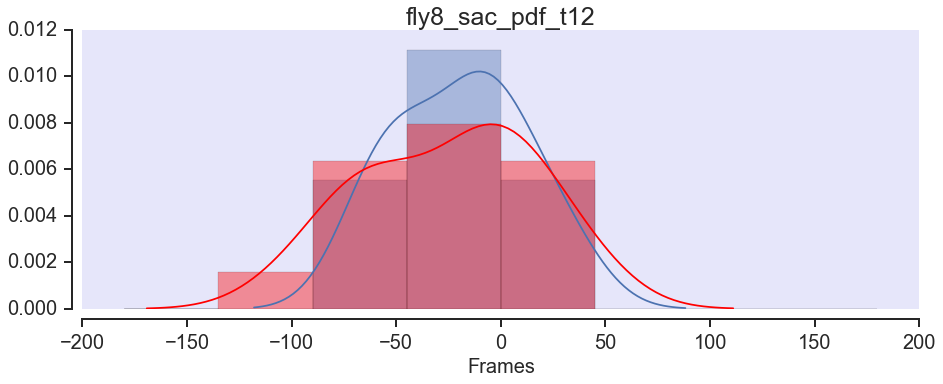

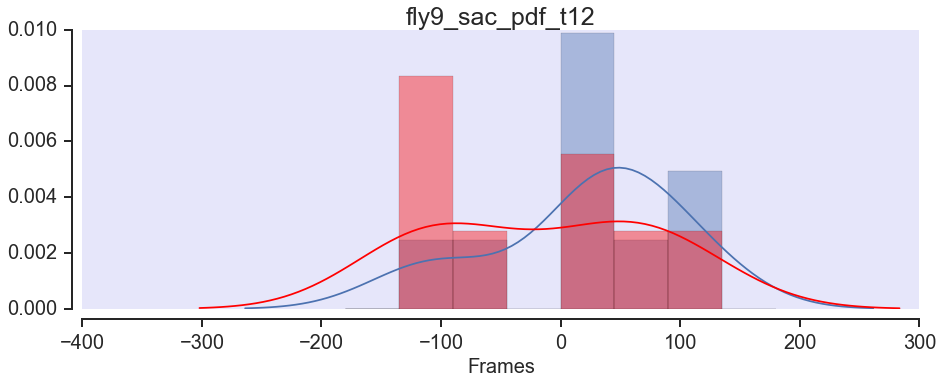

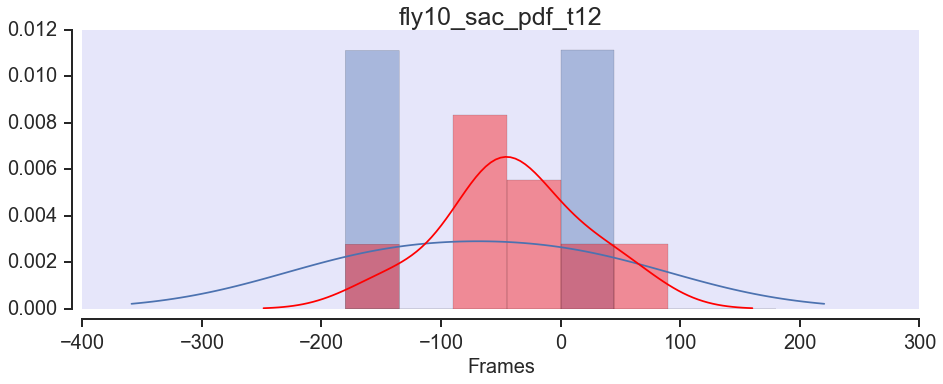

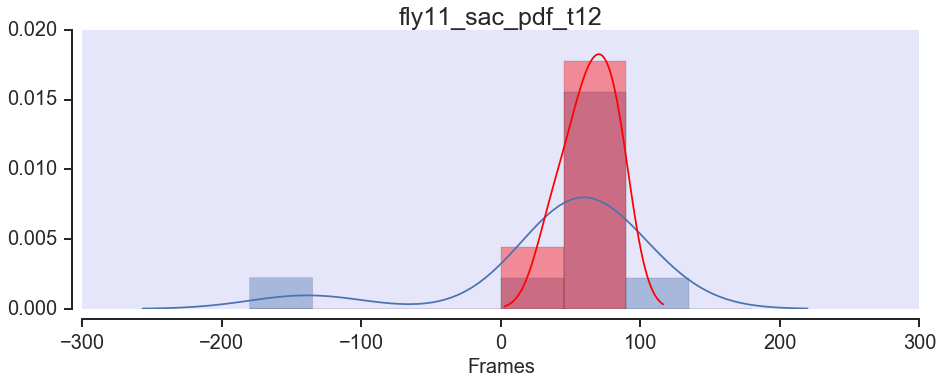

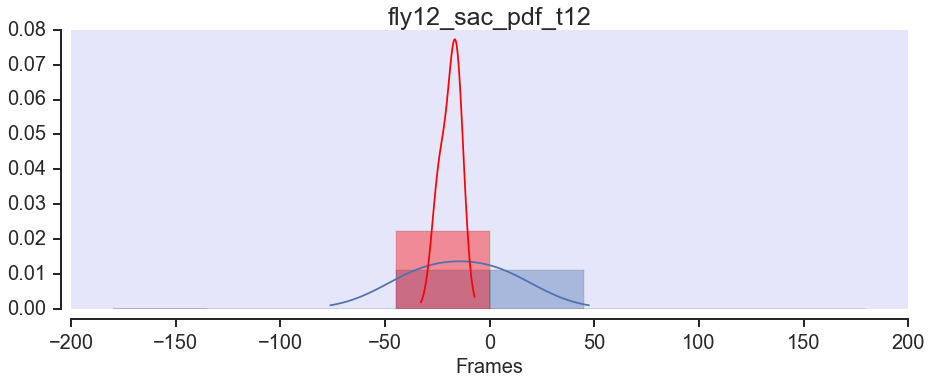

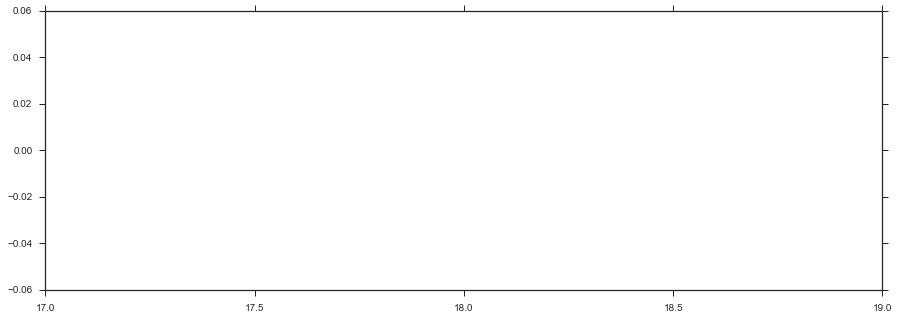

In [61]:
# #run saccade identifier for single time bout (t)

# #path to save figs if True
# sFigPath_t = '/Users/fponce/Documents/vdesert/VD_030620/saccade_ider_042320/'


tpj = 5
for i in range(len(allangles_vf_uw)):

    j1 = all_start_frames_m[i][tpj]
    j2 = all_end_frames_m[i][tpj]
    
#     j1 = 18923
#     j2 = 25523
#     print(j1,j2)

    flyAngle_uw = allangles_vf_uw[i][j1:j2]

    SMagMx_t, SMagMn_t, SAmx_t, SAmn_t, SVmx_t, SVmn_t, headingVelo_t, SVMxThr_t, SVMnThr_t, \
    flyAngleFilt_t, SSctnMx_t, SSctnMn_t = fs_pt.findSacs_n_plot(flyAngle_uw, i, sFigPath_t, False)
    
    xxx = SVMxThr_t[~np.isnan(SVMxThr_t)]
    yyy = SVmx_t[~np.isnan(SVmx_t)]
    
    
    
    #pltSacs_1(flyAngle_uw, i, tpj, sFigPath_t, headingVelo_t, SVMxThr_t, SVMnThr_t, flyAngleFilt_t,\
              #SSctnMx_t, SSctnMn_t, SAmx_t, SAmn_t)
    
    a_wr1 = np.arctan2(np.sin(np.deg2rad(flyAngle_uw)), np.cos(np.deg2rad(flyAngle_uw)))
    a_wr = np.rad2deg(a_wr1)

    
    nan_array = np.isnan(SMagMx_t)
    not_nan_array = ~ nan_array
    array2 = (a_wr[not_nan_array])
    

    nan_array1 = np.isnan(SMagMn_t)
    not_nan_array1 = ~ nan_array1
    array3 = (a_wr[not_nan_array1])
    
    plt.figure()
    fig, ax1 = plt.subplots(1,1,figsize=(15, 5)) 
    
    k = sns.distplot(array2,bins=[-180, -135, -90, -45, 0, 45, 90, 135, 180], hist=True, norm_hist=True)
    plt.title(i)
    
    ax1.patch.set_facecolor('lavender')
    sns.set_style("ticks")
    sns.despine()
    ax1.autoscale()
    #ax1.set_title('gain = '+str(test_gains[j]),fontsize = 20, fontweight='bold')
   #plt.ylim(0, None)
    #plt.ylim(0, 0.025)
    ax1.tick_params(direction='out', length=8, width=2)
    sns.despine(offset=10, trim=False);
    ax1.spines['left'].set_smart_bounds(True)
    ax1.spines['bottom'].set_smart_bounds(True)
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    #ax1.grid(False,linewidth=2)
    ax1.yaxis.set_tick_params(labelsize=20)
    ax1.xaxis.set_tick_params(labelsize=20)
    ax1.set_xlabel('Frames', fontsize=20)
    
#     plt.figure()
#     fig, ax1 = plt.subplots(1,1,figsize=(15, 5))
    p = sns.distplot(array3,bins=[-180, -135, -90, -45, 0, 45, 90, 135, 180], hist=True, norm_hist=True, color='red')
    plt.title('fly' + str(i) +'_sac_pdf_t12', fontsize=25)
    
    ax1.patch.set_facecolor('lavender')
    sns.set_style("ticks")
    sns.despine()
    ax1.autoscale()
    #ax1.set_title('gain = '+str(test_gains[j]),fontsize = 20, fontweight='bold')
   #plt.ylim(0, None)
    #plt.ylim(0, 0.025)
    ax1.tick_params(direction='out', length=8, width=2)
    sns.despine(offset=10, trim=False);
    ax1.spines['left'].set_smart_bounds(True)
    ax1.spines['bottom'].set_smart_bounds(True)
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    #ax1.grid(False,linewidth=2)
    ax1.yaxis.set_tick_params(labelsize=20)
    ax1.xaxis.set_tick_params(labelsize=20)
    ax1.set_xlabel('Frames', fontsize=20)


In [56]:
# #run saccade identifier for single time bout (t)

# #path to save figs if True
# sFigPath_t = '/Users/fponce/Documents/vdesert/VD_030620/saccade_ider_042320/'

# # all_SMagMx_t = []
# # all_SMagMn_t = []
# # all_SAmx_t = []
# # all_SAmn_t = []
# # all_SVmx_t = []
# # all_SVmn_t = []
# # all_headingVelo_t = []

# tpj = 5
# for i in range(len(allangles_vf_uw)):

#     j1 = all_start_frames_m[i][tpj]
#     j2 = all_end_frames_m[i][tpj]

#     flyAngle_uw = allangles_vf_uw[i][j1:j2]

#     SMagMx_t, SMagMn_t, SAmx_t, SAmn_t, SVmx_t, SVmn_t, headingVelo_t, SVMxThr_t, SVMnThr_t, \
#     flyAngleFilt_t, SSctnMx_t, SSctnMn_t = fs_pt.findSacs_n_plot(flyAngle_uw, i, sFigPath_t, False)
    
#     xxx = SMagMx_t[~np.isnan(SMagMx_t)]
#     yyy = SMagMn_t[~np.isnan(SMagMn_t)]
    
#     import random

#     r = []
#     for i in range(len(xxx)):
#         r.append(random.random())


#     plt.figure()
#     plt.scatter(r,np.abs(xxx), c = 'b')
    
#     rr = []
#     for i in range(len(yyy)):
#         rr.append(random.random()+2)
        
#     plt.scatter(rr,np.abs(yyy), c = 'r')

#     #plt.figure()
#     #plt.plot(np.abs(yyy), c = 'r')
    
    
# #     all_SMagMx_t.append(SMagMx)
# #     all_SMagMn_t.append(SMagMn_t)
# #     all_SAmx_t.append(SAmx_t)
# #     all_SAmn_t.append(SAmn_t)
# #     all_SVmx_t.append(SVmx_t)
# #     all_SVmn_t.append(SVmn_t)
# #     all_headingVelo_t.append(headingVelo_t)




In [10]:
# #density plots
# sns.set_style("ticks")

# #run saccade identifier for single time bout (t)

# #path to save figs if True
# sFigPath_t = '/Users/fponce/Documents/vdesert/VD_030620/saccade_ider/'

# # all_SMagMx_t = []
# # all_SMagMn_t = []
# # all_SAmx_t = []
# # all_SAmn_t = []
# # all_SVmx_t = []
# # all_SVmn_t = []
# # all_headingVelo_t = []
# tp = 0
# tpj = 12
# for i in range(len(allangles_vf_uw)):

#     j1 = all_start_frames_m[i][tpj]
#     j2 = all_end_frames_m[i][tpj]
# #     j1 = 18923
# #     j2 = 25523
#     #print(j1,j2)
#     flyAngle_uw = allangles_vf_uw[i][j1:j2]
    
#     a_wr1 = np.arctan2(np.sin(np.deg2rad(flyAngle_uw)), np.cos(np.deg2rad(flyAngle_uw)))
#     a_wr = np.rad2deg(a_wr1)
    

#     #flyAngle_s_t = np.rad2deg(np.unwrap(np.deg2rad(flyAngle_wr_t), discont = np.pi))
    
#     SMagMx_t, SMagMn_t, SAmx_t, SAmn_t, SVmx_t, SVmn_t, headingVelo_t, SVMxThr_t, SVMnThr_t, \
#     flyAngleFilt_t, SSctnMx_t, SSctnMn_t = fs_pt.findSacs_n_plot(flyAngle_uw, i, sFigPath_t, False)
    
#     nan_array = np.isnan(SMagMx_t)
#     not_nan_array = ~ nan_array
#     array2 = a_wr[not_nan_array]
    

#     nan_array1 = np.isnan(SMagMn_t)
#     not_nan_array1 = ~ nan_array1
#     array3 = a_wr[not_nan_array1]
    
#     plt.figure()
#     fig, ax1 = plt.subplots(1,1,figsize=(15, 5)) 
    
#     k = sns.distplot(array2,bins=[-180, -135, -90, -45, 0, 45, 90, 135, 180], hist=True, norm_hist=True)
#     plt.title(i)
    
#     ax1.patch.set_facecolor('lavender')
#     sns.set_style("ticks")
#     sns.despine()
#     ax1.autoscale()
#     #ax1.set_title('gain = '+str(test_gains[j]),fontsize = 20, fontweight='bold')
#    #plt.ylim(0, None)
#     #plt.ylim(0, 0.025)
#     ax1.tick_params(direction='out', length=8, width=2)
#     sns.despine(offset=10, trim=False);
#     ax1.spines['left'].set_smart_bounds(True)
#     ax1.spines['bottom'].set_smart_bounds(True)
#     ax1.spines['left'].set_linewidth(2)
#     ax1.spines['bottom'].set_linewidth(2)
#     #ax1.grid(False,linewidth=2)
#     ax1.yaxis.set_tick_params(labelsize=20)
#     ax1.xaxis.set_tick_params(labelsize=20)
#     ax1.set_xlabel('Frames', fontsize=20)
    
# #     plt.figure()
# #     fig, ax1 = plt.subplots(1,1,figsize=(15, 5))
#     p = sns.distplot(array3,bins=[-180, -135, -90, -45, 0, 45, 90, 135, 180], hist=True, norm_hist=True, color='red')
#     plt.title('fly' + str(i) +'_sac_pdf_t12', fontsize=25)
    
#     ax1.patch.set_facecolor('lavender')
#     sns.set_style("ticks")
#     sns.despine()
#     ax1.autoscale()
#     #ax1.set_title('gain = '+str(test_gains[j]),fontsize = 20, fontweight='bold')
#    #plt.ylim(0, None)
#     #plt.ylim(0, 0.025)
#     ax1.tick_params(direction='out', length=8, width=2)
#     sns.despine(offset=10, trim=False);
#     ax1.spines['left'].set_smart_bounds(True)
#     ax1.spines['bottom'].set_smart_bounds(True)
#     ax1.spines['left'].set_linewidth(2)
#     ax1.spines['bottom'].set_linewidth(2)
#     #ax1.grid(False,linewidth=2)
#     ax1.yaxis.set_tick_params(labelsize=20)
#     ax1.xaxis.set_tick_params(labelsize=20)
#     ax1.set_xlabel('Frames', fontsize=20)
    
#     #saving fig
#     savePlotName = sFigPath + 'fly' + str(i) +'_sac_pdf_t12'+'.png'
#     fig.savefig(savePlotName , bbox_inches='tight', dpi = 600)#dpi = 1200)
#     plt.close

In [13]:
# #magnitude vs speed
# sns.set_style("ticks")
# fig, ax1 = plt.subplots(1,1,figsize=(10, 10))
# for i in range(len(allangles_vf_filt)):
    
#     #fig, ax1 = plt.subplots(1,1,figsize=(15, 5))
#     plt.plot(all_SMagMx[i], all_SVmx[i], '.', color = sns.xkcd_rgb["denim blue"], markersize=12, alpha = 0.5)
    
#     ax1.set_title('Saccade magnitude vs speed', fontname='Arial', fontsize = 22)
#     ax1.set_xlabel('saccade magnitude', fontsize=18)
#     ax1.set_ylabel('saccade speed', fontsize=18)
# #     ax1.set_ylim([0, 400])
# #     ax1.set_xlim([0, (len(p))])
# #     ax1.set_xlim([3800, 4100])

# #   ax1.set_xticks(np.arange(0, 5401, 1800))
# #     ax1.set_yticks(np.arange(-180, 225,45))
#     ax1.yaxis.set_tick_params(labelsize=20)
#     ax1.xaxis.set_tick_params(labelsize=20)
#     sns.despine()
#     ax1.tick_params(direction='in', length=8, width=2)
#     sns.despine(offset=10, trim=False);
#     ax1.spines['left'].set_linewidth(2)
#     ax1.spines['bottom'].set_linewidth(2)
#     ax1.grid(True,linewidth=2)    